In [1]:
import os, sys, time, glob, io, pprint, re, shutil
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random
import json

import matplotlib.pyplot as plt
import h5py
import pandas as pd
from datetime import datetime

from scipy import signal
from scipy import sparse
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [2]:
train_data=h5py.File("train_data.h5", 'r')

train_dicts={}
test_dicts={}
for i in range(2):
    a=[value for (key,value) in train_data.items() if np.array(value["medium"]) == i]
    train_dicts[i], test_dicts[i]=train_test_split(a, test_size=0.1, shuffle=True)
    print("number of (train, test) instances in medium "+str(i)+"\t"+str(len(train_dicts[i])),","+str(len(test_dicts[i])))
# dattest=h5py.File(fnametest+".h5", 'r')
# Xo_train=np.array(dat["data"])


number of (train, test) instances in medium 0	7182 ,798
number of (train, test) instances in medium 1	7218 ,802


In [3]:
nsamp=6000
ntau=20
Xo=np.zeros([nsamp,ntau,100,160,1], np.float32)
Xolabels=[ dict() for ii in range(nsamp)]

for ii in range(nsamp):
    skey=random.choice(range(2))

    ln = train_dicts[skey]
        
    for kk in range(ntau):
        jj=random.randint(0,len(ln)-1)
        # ln=list(newDict.items())
        Xo[ii,kk,:,:,0]=ln[jj]["data"]
        Xolabels[ii][kk]={'medium' : int(np.array(ln[jj]["medium"]))}
with open('../seismicTL_circular1.json', 'w') as outfile:
    json.dump(Xolabels, outfile)
hf = h5py.File('../seismicTL_circular1.h5', 'w')
hf.create_dataset('data', data=Xo)
hf.close()

In [4]:
nsamp=100
ntau=20
Xo=np.zeros([nsamp,ntau,100,160,1], np.float32)
Xolabels=[ dict() for ii in range(nsamp)]

for ii in range(nsamp):
    skey=random.choice(range(2))

    ln = test_dicts[skey]
        
    for kk in range(ntau):
        jj=random.randint(0,len(ln)-1)
        # ln=list(newDict.items())
        Xo[ii,kk,:,:,0]=ln[jj]["data"]
        Xolabels[ii][kk]={'medium' : int(np.array(ln[jj]["medium"]))}
with open('../testseismicTL_circular1.json', 'w') as outfile:
    json.dump(Xolabels, outfile)
hf = h5py.File('../testseismicTL_circular1.h5', 'w')
hf.create_dataset('data', data=Xo)
hf.close()

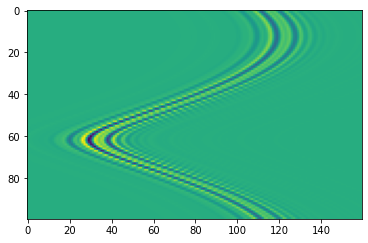

In [10]:
import matplotlib.pyplot as plt

plt.imshow(Xo[random.randint(0,nsamp),0,:,:,0])

In [ ]:
train_data